# Llama3 as Expert Evaluator
Comparing off-the-shelf models: T5 vs. BART vs. Pegasus

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
#instantiate a dataframe for the "off-the-shelf" analysis (df_ots)
df_ots=pd.read_csv('data/llm_evaluator_off_the_shelf_comparison.csv')
df_ots.head(5)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,bart_fine_tuned_summaries,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results
0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,manchester united have fallen off their perch....,whether we are talking about the events of wed...,bart,bart,bart,bart,bart,bart
1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,rachael neustadt and her two sons were freed i...,a mother whose russian husband snatched their ...,pegasus,pegasus,bart,pegasus,pegasus,t5
2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,claim: supporters of mayor lutfur rahman hande...,a petition brought before the high court claim...,bart,bart,t5,t5,bart,t5
3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,cousin of palestinian boy burned to death in i...,the 15-year-old cousin of a palestinian boy wh...,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus
4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,spearmint rhino has filed accounts showing tha...,"despite the losses, spearmint rhino says it ha...",t5,pegasus,pegasus,t5,bart,t5


In [48]:
df_ots.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'article',
       'highlights', 'id', 't5_summaries', 't5_fine_tuned_summaries',
       'bart_summaries', 'bart_fine_tuned_summaries', 'pegasus_summaries',
       'order_1_results', 'order_2_results', 'order_3_results',
       'order_4_results', 'order_5_results', 'order_6_results'],
      dtype='object')

In [49]:
cols_to_compare = ['order_1_results', 'order_2_results', 'order_3_results',
       'order_4_results', 'order_5_results', 'order_6_results']


In [50]:
row_modes = df_ots[cols_to_compare].mode(axis=1)
row_modes.tail(20)

,0,1,2
180,bart,NaN,NaN
181,pegasus,NaN,NaN
182,bart,NaN,NaN
183,bart,NaN,NaN
184,bart,NaN,NaN
185,pegasus,NaN,NaN
186,bart,NaN,NaN
187,bart,NaN,NaN
188,pegasus,NaN,NaN
189,bart,NaN,NaN


In [51]:
df_ots.tail()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,bart_fine_tuned_summaries,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results
195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,the show says it was a case of 'misidentificat...,bart,bart,bart,pegasus,bart,pegasus
196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,the average cost of raising a child to seconda...,the average cost of raising a child to seconda...,"the bulk of the total £83,627-a-year bill come...",t5,bart,bart,t5,bart,t5
197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",thai police investigating the murder of two br...,thai police investigating the murder of two br...,a spokesman for the royal thai police confirme...,bart,bart,bart,bart,bart,bart
198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",from clumpy flat shoes that seem to shorten a ...,kim carillo tests some of the latest man-repel...,"here, kim carillo, who usually favours a more ...",bart,pegasus,pegasus,pegasus,bart,bart
199,199,199,199,199,"for most people, a trip to the shops involves ...",moose spent seven hours dashing through the fi...,6f4bbcea20c6d6132b5d987912e06b5f6099a6ea,runaway elk caught dashing through streets of ...,runaway elk caught dashing through streets of ...,"for most people, a trip to the shops involves ...",two moose captured dashing through the streets...,moose on the loose: a runaway elk was captured...,pegasus,pegasus,t5,pegasus,t5,t5


In [52]:
type(row_modes)

pandas.core.frame.DataFrame

In [53]:
df_ots = pd.concat([df_ots,row_modes], axis=1)

df_ots

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,...,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results,0,1,2
0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,...,whether we are talking about the events of wed...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN
1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,...,a mother whose russian husband snatched their ...,pegasus,pegasus,bart,pegasus,pegasus,t5,pegasus,NaN,NaN
2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,...,a petition brought before the high court claim...,bart,bart,t5,t5,bart,t5,bart,t5,NaN
3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,...,the 15-year-old cousin of a palestinian boy wh...,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,NaN,NaN
4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,...,"despite the losses, spearmint rhino says it ha...",t5,pegasus,pegasus,t5,bart,t5,t5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,the show says it was a case of 'misidentificat...,bart,bart,bart,pegasus,bart,pegasus,bart,NaN,NaN
196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,the average cost of raising a child to seconda...,...,"the bulk of the total £83,627-a-year bill come...",t5,bart,bart,t5,bart,t5,bart,t5,NaN
197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",thai police investigating the murder of two br...,...,a spokesman for the royal thai police confirme...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN
198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",from clumpy flat shoes that seem to shorten a ...,...,"here, kim carillo, who usually favours a more ...",bart,pegasus,pegasus,pegasus,bart,

In [54]:
df_ots.rename(columns={0: 'mode_0', 1: 'mode_1', 2: 'mode_2'}, inplace=True)
df_ots

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,...,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results,mode_0,mode_1,mode_2
0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,...,whether we are talking about the events of wed...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN
1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,...,a mother whose russian husband snatched their ...,pegasus,pegasus,bart,pegasus,pegasus,t5,pegasus,NaN,NaN
2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,...,a petition brought before the high court claim...,bart,bart,t5,t5,bart,t5,bart,t5,NaN
3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,...,the 15-year-old cousin of a palestinian boy wh...,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,NaN,NaN
4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,...,"despite the losses, spearmint rhino says it ha...",t5,pegasus,pegasus,t5,bart,t5,t5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,the show says it was a case of 'misidentificat...,bart,bart,bart,pegasus,bart,pegasus,bart,NaN,NaN
196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,the average cost of raising a child to seconda...,...,"the bulk of the total £83,627-a-year bill come...",t5,bart,bart,t5,bart,t5,bart,t5,NaN
197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",thai police investigating the murder of two br...,...,a spokesman for the royal thai police confirme...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN
198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",from clumpy flat shoes that seem to shorten a ...,...,"here, kim carillo, who usually favours a more ...",bart,pegasus,pegasu

In [56]:
df_ots.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,99.500000,99.500000,99.500000
std,57.879185,57.879185,57.879185,57.879185
min,0.000000,0.000000,0.000000,0.000000
25%,49.750000,49.750000,49.750000,49.750000
50%,99.500000,99.500000,99.500000,99.500000
75%,149.250000,149.250000,149.250000,149.250000
max,199.000000,199.000000,199.000000,199.000000


In [57]:
df_ots.describe(include='all')

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,...,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results,mode_0,mode_1,mode_2
count,200.000000,200.000000,200.000000,200.000000,200,200,200,200,200,200,...,200,193,200,199,198,199,189,200,25,2
unique,NaN,NaN,NaN,NaN,200,200,200,200,200,200,...,200,3,3,3,3,3,3,3,2,1
top,NaN,NaN,NaN,NaN,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,...,whether we are talking about the events of wed...,bart,bart,bart,pegasus,bart,bart,bart,pegasus,t5
freq,NaN,NaN,NaN,NaN,1,1,1,1,1,1,...,1,123,137,133,101,158,74,138,15,2
mean,99.500000,99.500000,99.500000,99.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57.879185,57.879185,57.879185,57.879185,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,49.750000,49.750000,49.750000,49.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,99.500000,99.500000,99.500000,99.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,149.250000,149.250000,149.250000,149.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_ots.head(10)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,...,pegasus_summaries,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results,mode_0,mode_1,mode_2
0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,...,whether we are talking about the events of wed...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN
1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,...,a mother whose russian husband snatched their ...,pegasus,pegasus,bart,pegasus,pegasus,t5,pegasus,NaN,NaN
2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,...,a petition brought before the high court claim...,bart,bart,t5,t5,bart,t5,bart,t5,NaN
3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,...,the 15-year-old cousin of a palestinian boy wh...,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,NaN,NaN
4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,...,"despite the losses, spearmint rhino says it ha...",t5,pegasus,pegasus,t5,bart,t5,t5,NaN,NaN
5,5,5,5,5,philippe senderos insists switzerland are maki...,defender insists switzerland are confident of ...,63838e0eaac96148cd8b78220fdd21c9d6b2b328,philppe senderos insists switzerland are makin...,philppe senderos insists switzerland are makin...,philippe senderos insists switzerland are maki...,...,focused: philppe senderos says switzerland can...,pegasus,bart,bart,pegasus,bart,t5,bart,NaN,NaN
6,6,6,6,6,ahead of this wednesday's uefa champions leagu...,diego costa is fit to face maribor after retur...,1ea5791df11bde43a95bd25551e01b3809ca582c,chelsea face maribor in the champions league o...,diego costa is fit to face maribor after retur...,ahead of this wednesday's uefa champions leagu...,...,ahead of this wednesday's uefa champions leagu...,t5,pegasus,t5,pegasus,pegasus,t5,pegasus,t5,NaN
7,7,7,7,7,lord turner: 'innovative policies' a row erupt...,lord turner said the bank of england’s controv...,7cfa6b961f29952701e769c79af07e9e466bf7a5,lord turner is a frontrunner to succeed sir me...,"lord turner, a frontrunner to succeed sir merv...",lord turner: 'innovative policies' a row erupt...,...,lord turner: 'innovative policies' a row erupt...,t5,bart,t5,pegasus,bart,t5,t5,NaN,NaN
8,8,8,8,8,david silva is determined to win the champions...,david silva has signed a new five-year deal .s...,eeb2f3a0c31870ffe91586d69f58da8f7ca92f8b,david silva has signed a new five-year deal wi...,david silva agrees new five-year deal with man...,david silva is determined to win the champions...,...,david silva is determined to win the champions...,pegasus,pegasus,pegasus,pegasus,bart,pegasus,pegasus,NaN,NaN
9,9,9,9,9,busty glamour model lacey wildd has raised $23...,"the surgery will see lacey wil

In [60]:
import numpy as np

In [63]:
df_ots['winner'] = np.where(df_ots['mode_1'].isna() & df_ots['mode_2'].isna(), df_ots['mode_0'], 'none')
df_ots

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,...,order_1_results,order_2_results,order_3_results,order_4_results,order_5_results,order_6_results,mode_0,mode_1,mode_2,winner
0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN,bart
1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,...,pegasus,pegasus,bart,pegasus,pegasus,t5,pegasus,NaN,NaN,pegasus
2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,...,bart,bart,t5,t5,bart,t5,bart,t5,NaN,none
3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,...,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,pegasus,NaN,NaN,pegasus
4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,...,t5,pegasus,pegasus,t5,bart,t5,t5,NaN,NaN,t5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,bart,bart,bart,pegasus,bart,pegasus,bart,NaN,NaN,bart
196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,the average cost of raising a child to seconda...,...,t5,bart,bart,t5,bart,t5,bart,t5,NaN,none
197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",thai police investigating the murder of two br...,...,bart,bart,bart,bart,bart,bart,bart,NaN,NaN,bart
198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",from clumpy flat shoes that seem to shorten a ...,...,bart,pegasus,pegasus,pegasus,bart,bart,bart,pegasus,NaN,none


In [65]:
(df_ots
 ['winner']
 .value_counts()
)

winner
bart       116
pegasus     41
none        25
t5          18
Name: count, dtype: int64

In [66]:
116+41+25+18

200

In [67]:
data = {'model': ['bart', 'pegasus', 'none', 't5'],
        'value': [116, 41, 25, 18]}

df_ots_results = pd.DataFrame(data)

In [68]:

df_ots_results 

,model,value
0,bart,116
1,pegasus,41
2,none,25
3,t5,18


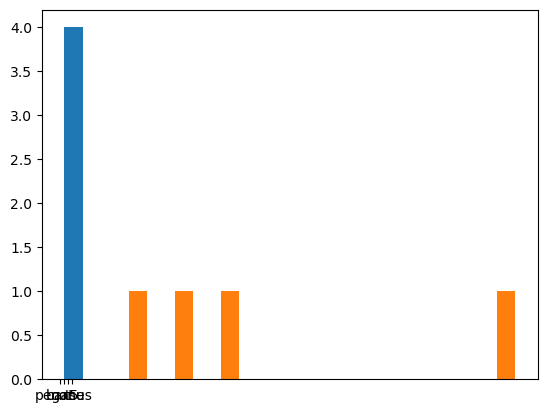

In [70]:

plt.hist(df_ots_results);

/tmp/ipykernel_2463870/69621594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);
/tmp/ipykernel_2463870/69621594.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);


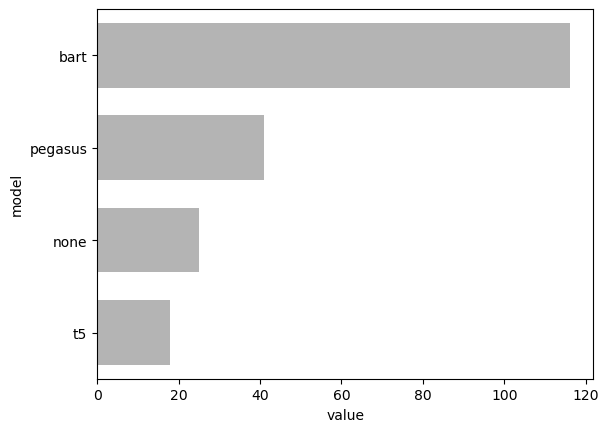

In [74]:
colors = sns.color_palette(['#B4B4B4'])
sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);

/tmp/ipykernel_2463870/2393872732.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);
/tmp/ipykernel_2463870/2393872732.py:27: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);


<Figure size 1800x1400 with 0 Axes>

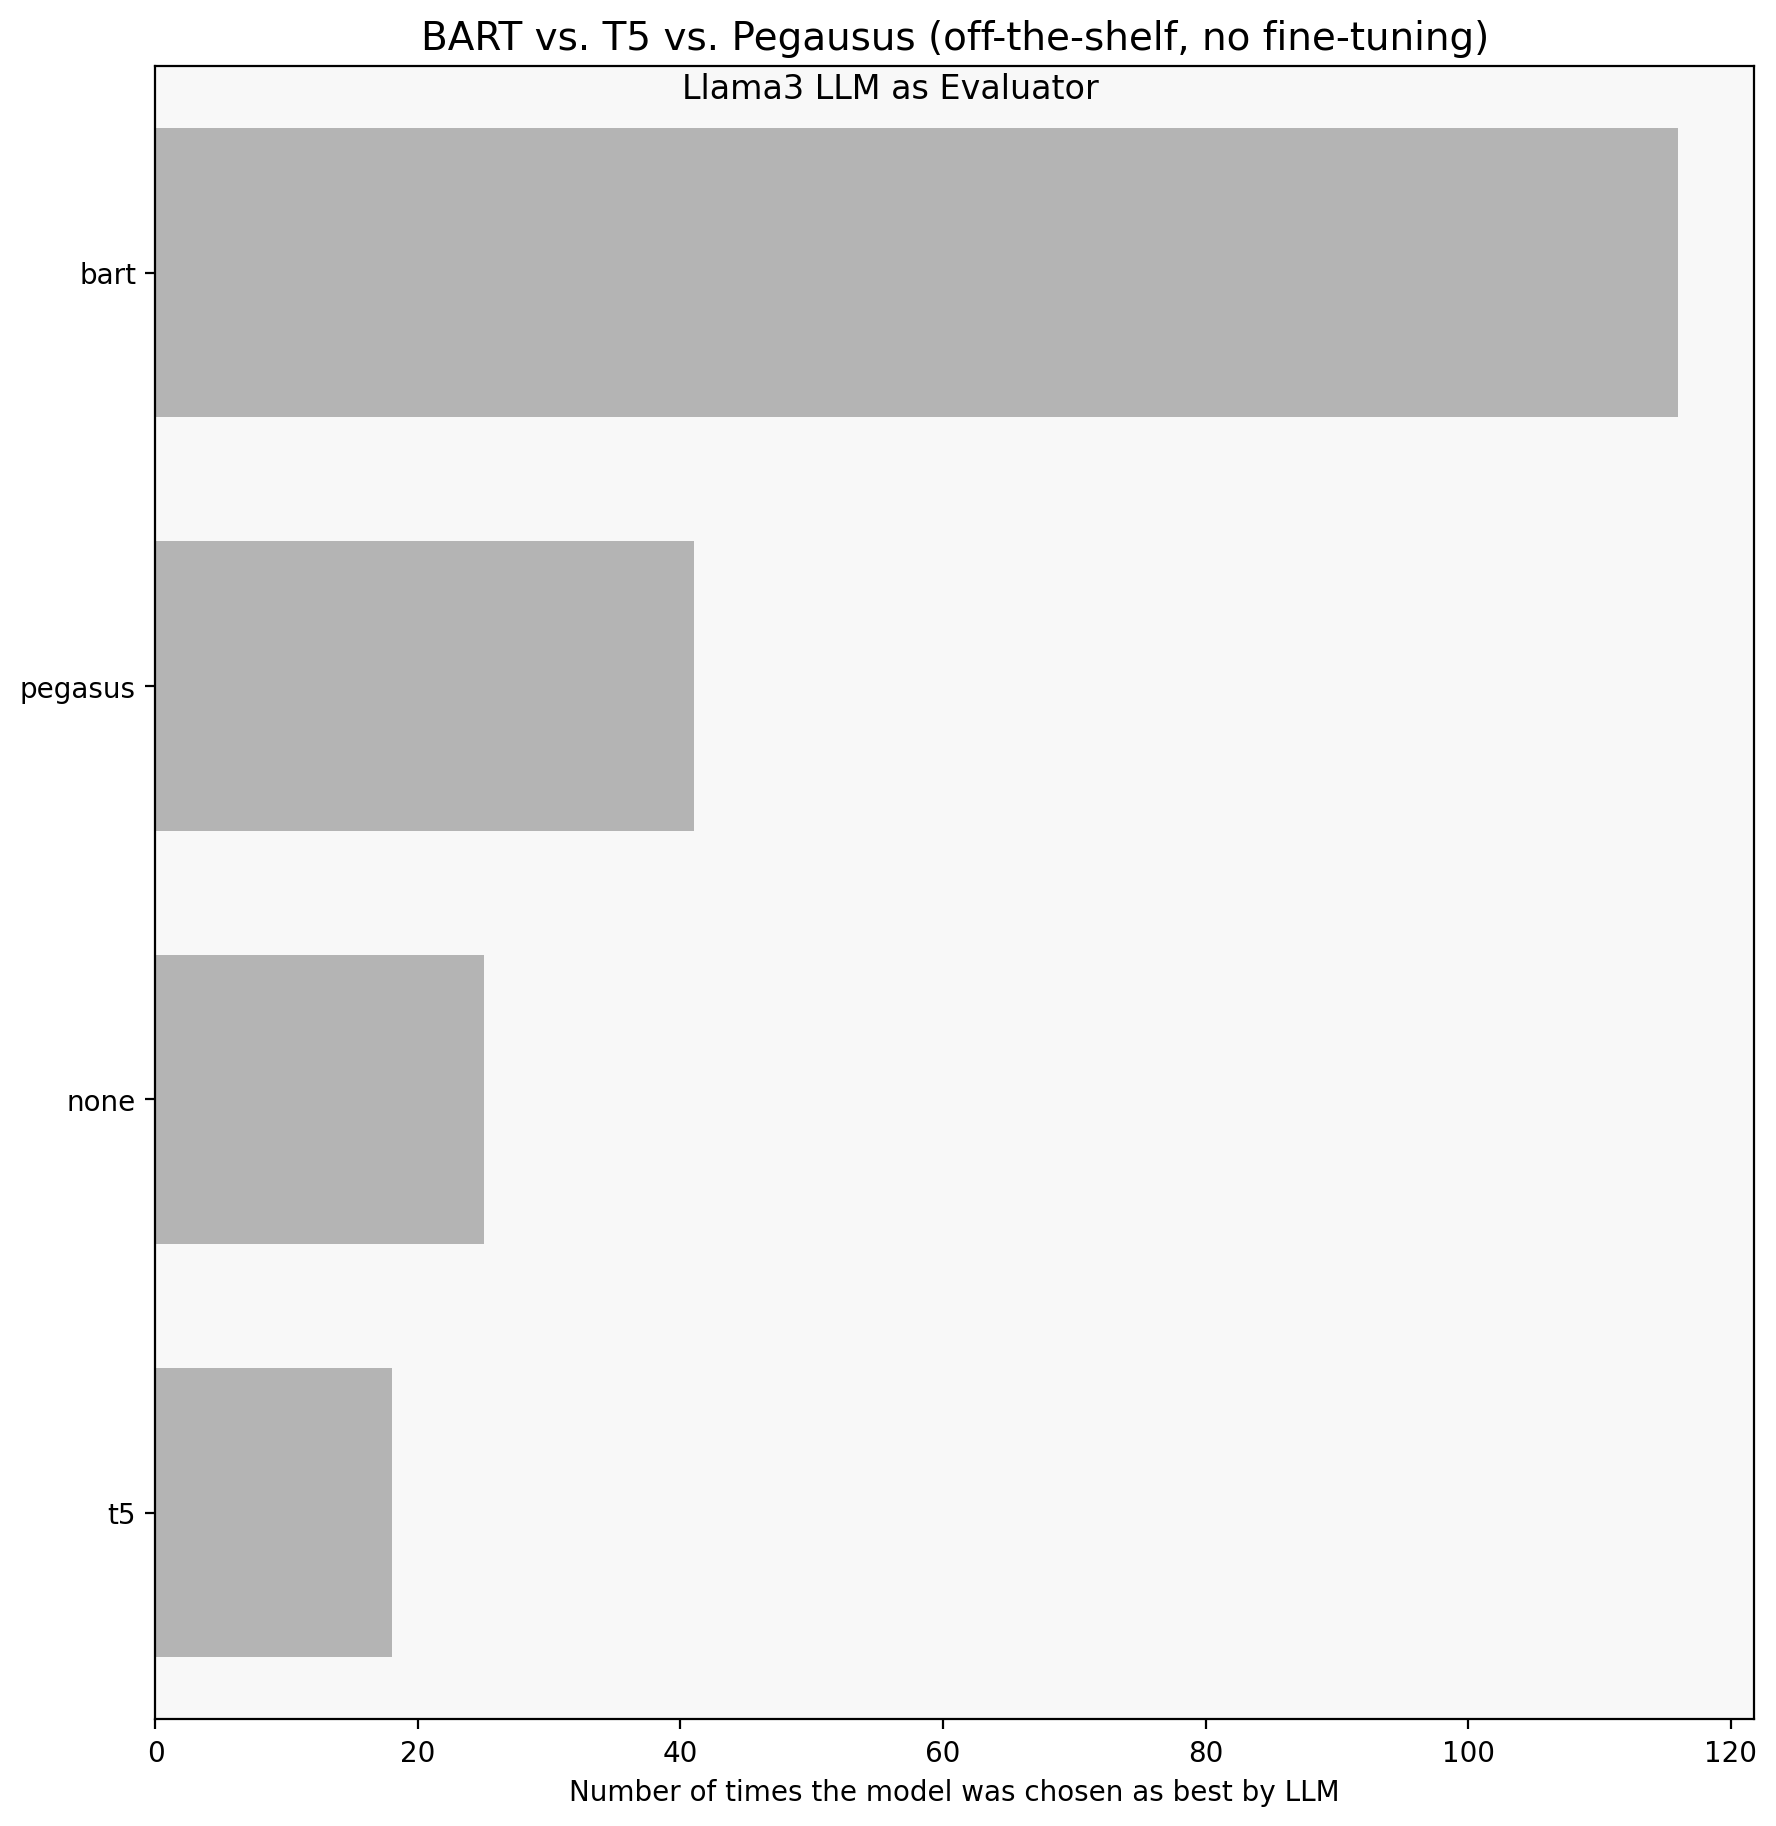

In [80]:
fig = plt.figure()

fig.patch.set_facecolor('white')
fig.patch.set_alpha(0)
fig = plt.figure(figsize=(9,9),linewidth=10, facecolor='white')
#setting the size



ax = fig.add_subplot(111)



ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.05)

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
plt.rcParams
plt.style.context('seaborn-paper')

#fig = plt.figure(linewidth = 1, edgecolor='lightgrey')


#colors = sns.color_palette(['#FF6F27'])
colors = sns.color_palette(['#B4B4B4'])
sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);

plt.xlabel('Number of times the model was chosen as best by LLM')
plt.ylabel('')
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
#plt.tight_layout()
plt.legend('', frameon=False)
plt.suptitle('Llama3 LLM as Evaluator')
plt.title('BART vs. T5 vs. Pegausus (off-the-shelf, no fine-tuning)', fontsize=14)
plt.grid(visible=True, axis='x', which='minor' )
#pos= [0,20, 40, 60, 80, 100]
#l=[0,20, 40, 60, 80, 100]
#ax.set(xticks=pos, xticklabels=l)
#plt.xlim(0,22000)
#annotating the plot
#plt.axvline(53, color='#FF6F27', linestyle='--', linewidth=.75)


/tmp/ipykernel_2463870/2685821470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)
/tmp/ipykernel_2463870/2685821470.py:1: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)


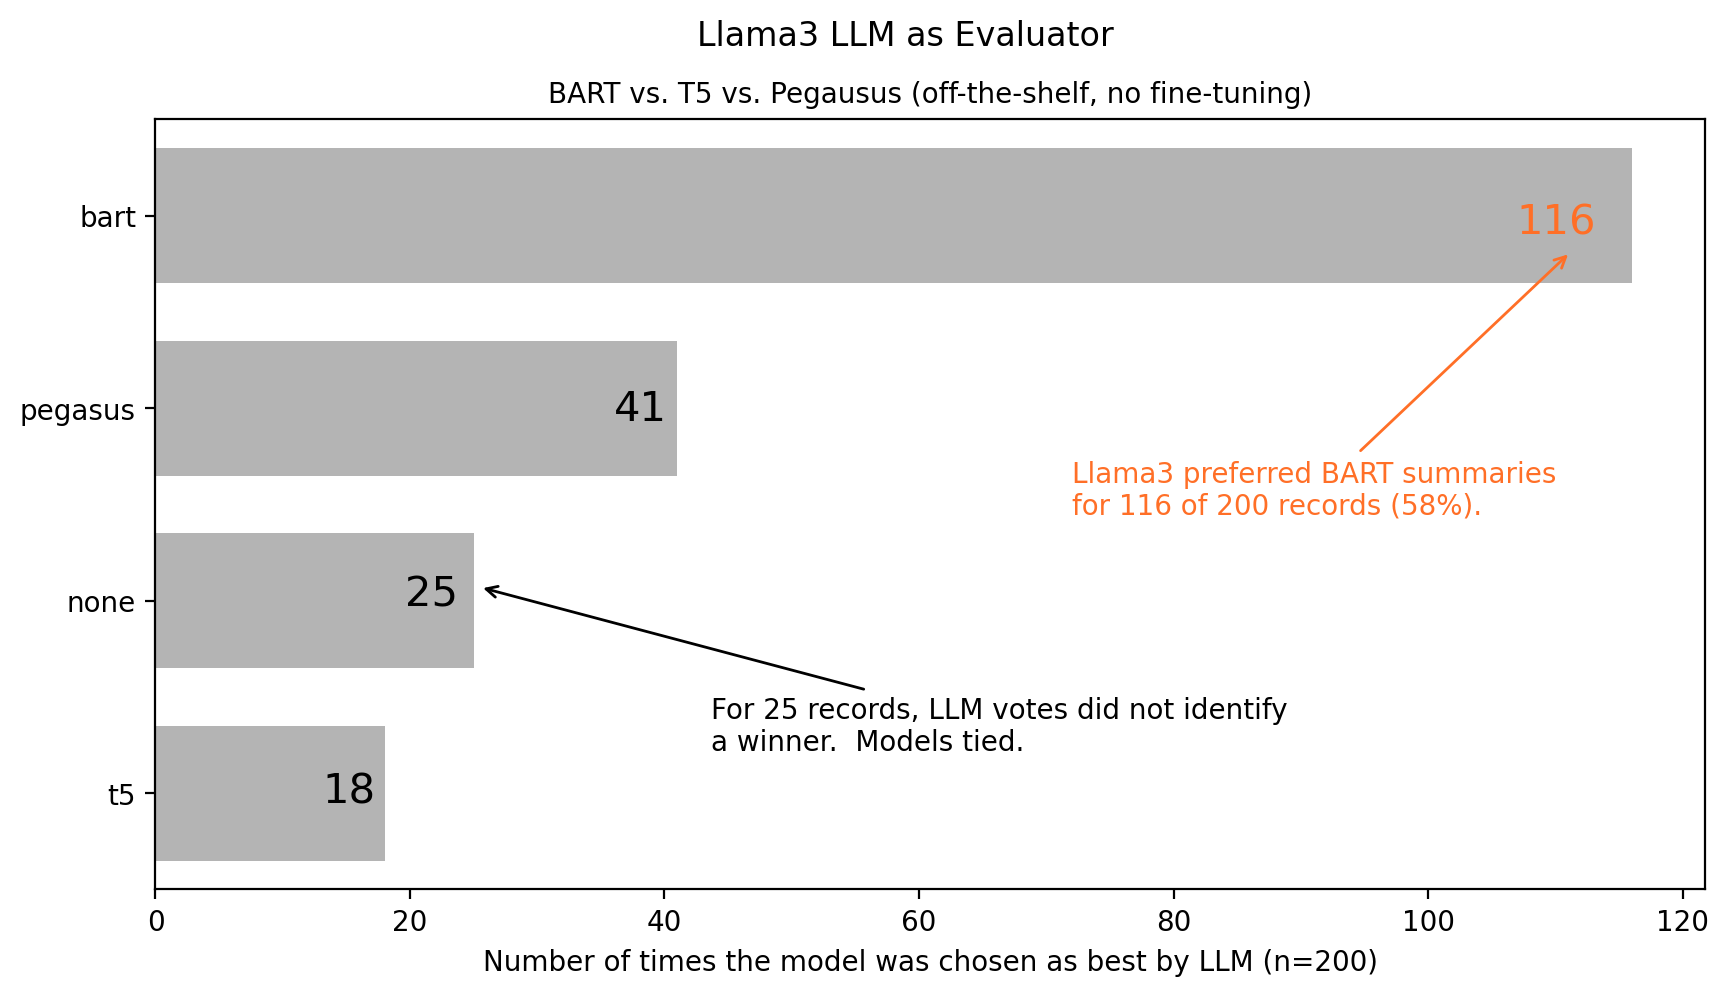

In [138]:
sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)
plt.xlabel('Number of times the model was chosen as best by LLM (n=200)')
plt.ylabel('')
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
#plt.tight_layout()
plt.legend('', frameon=False)
plt.suptitle('Llama3 LLM as Evaluator')
plt.title('BART vs. T5 vs. Pegausus (off-the-shelf, no fine-tuning)', fontsize=10)
#plt.grid(visible=True, axis='x', which='major' )
plt.annotate(text='116', xy=([500,500]), xycoords='axes points', xytext=(490,236), size=15, color='#FF6F27')
plt.annotate(text='41', xy=([500,500]), xycoords='axes points', xytext=(165,169), size=15)
plt.annotate(text='25', xy=([500,500]), xycoords='axes points', xytext=(90,102), size=15)
plt.annotate(text='18', xy=([500,500]), xycoords='axes points', xytext=(60,31), size=15)
plt.annotate(text='For 25 records, LLM votes did not identify \na winner.  Models tied. ', xy=([116,109]), xycoords='axes points', xytext=(200, 50), 
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
#            arrowprops=dict(arrowstyle='-[,widthB=6.2',color='#FF6F27',linewidth=1, connectionstyle='bar,fraction=0'))
plt.annotate(text='Llama3 preferred BART summaries \nfor 116 of 200 records (58%). ', xy=([510,230]), xycoords='axes points', xytext=(330, 135), color='#FF6F27',
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, color='#FF6F27', connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,

/tmp/ipykernel_2463870/1242907589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)
/tmp/ipykernel_2463870/1242907589.py:1: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)


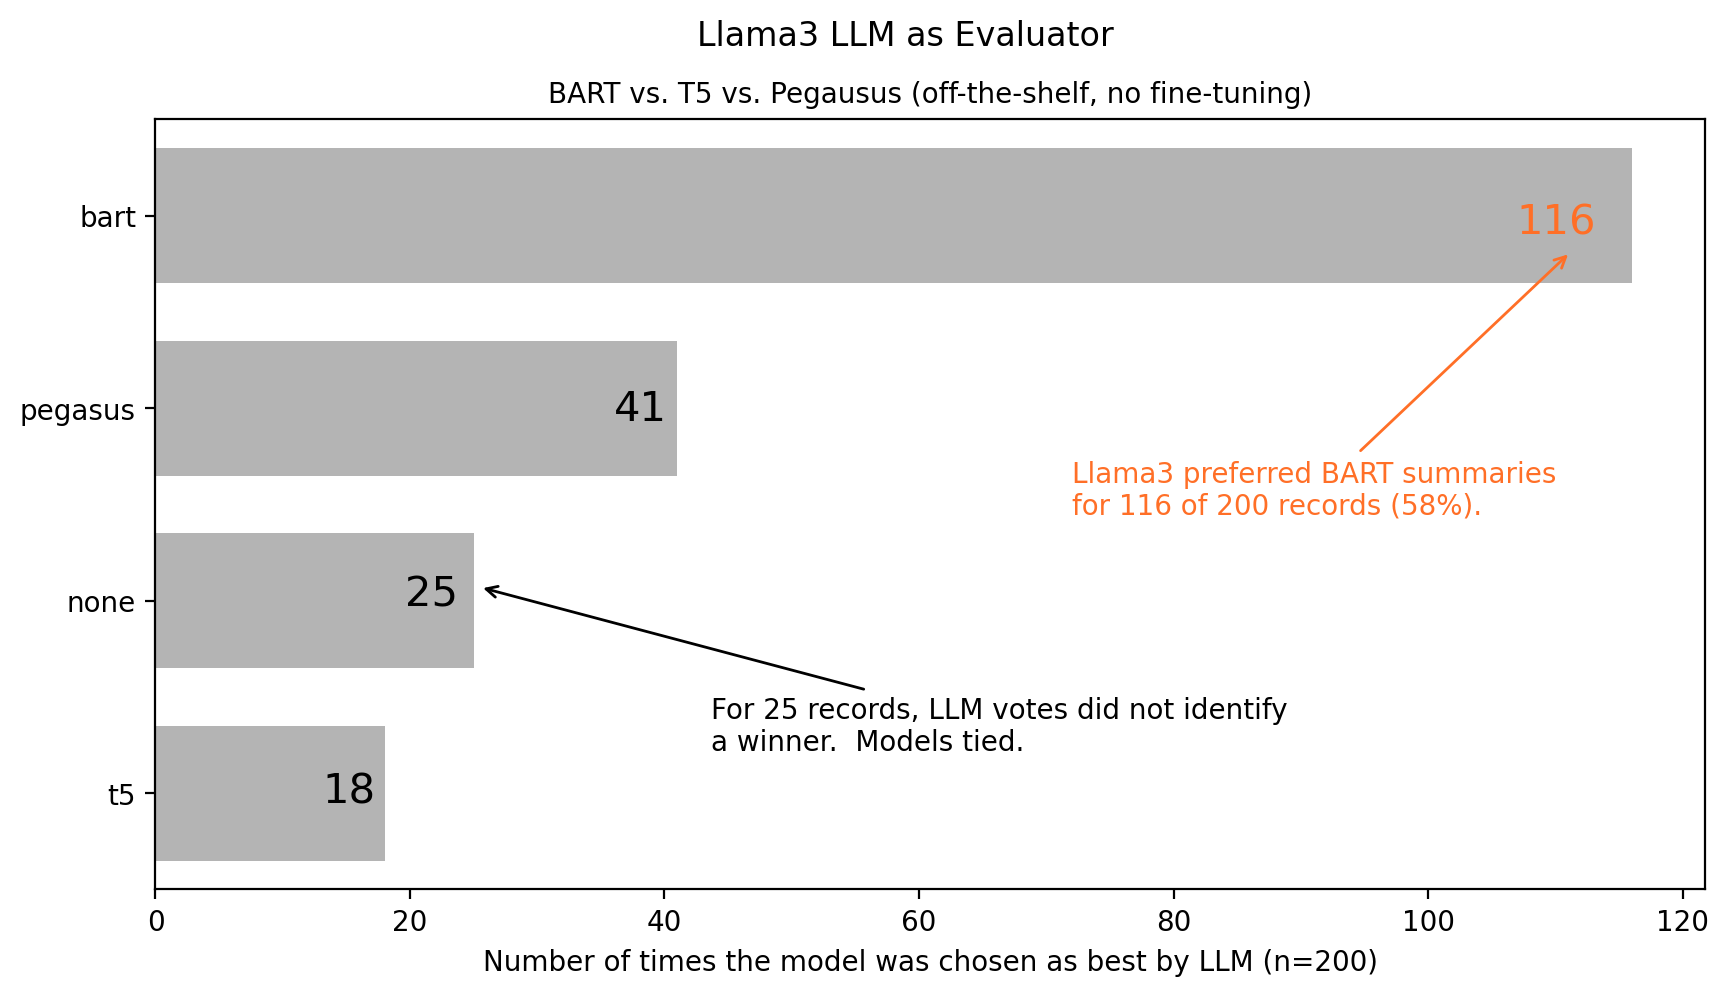

In [139]:
sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7)
plt.xlabel('Number of times the model was chosen as best by LLM (n=200)')
plt.ylabel('')
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
#plt.tight_layout()
plt.legend('', frameon=False)
plt.suptitle('Llama3 LLM as Evaluator')
plt.title('BART vs. T5 vs. Pegausus (off-the-shelf, no fine-tuning)', fontsize=10)
#plt.grid(visible=True, axis='x', which='major' )
plt.annotate(text='116', xy=([500,500]), xycoords='axes points', xytext=(490,236), size=15, color='#FF6F27')
plt.annotate(text='41', xy=([500,500]), xycoords='axes points', xytext=(165,169), size=15)
plt.annotate(text='25', xy=([500,500]), xycoords='axes points', xytext=(90,102), size=15)
plt.annotate(text='18', xy=([500,500]), xycoords='axes points', xytext=(60,31), size=15)
plt.annotate(text='For 25 records, LLM votes did not identify \na winner.  Models tied. ', xy=([116,109]), xycoords='axes points', xytext=(200, 50), 
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
#            arrowprops=dict(arrowstyle='-[,widthB=6.2',color='#FF6F27',linewidth=1, connectionstyle='bar,fraction=0'))
plt.annotate(text='Llama3 preferred BART summaries \nfor 116 of 200 records (58%). ', xy=([510,230]), xycoords='axes points', xytext=(330, 135), color='#FF6F27',
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, color='#FF6F27', connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
plt.savefig('data/llm_eval_off_the_shelf.png', bbox_inches='tight');

In [ ]:
fig = plt.figure()

fig.patch.set_facecolor('white')
fig.patch.set_alpha(0)

#setting the size



ax = fig.add_subplot(111)



ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.05)

plt.rcParams['figure.figsize'] = (9,7)
plt.rcParams['figure.dpi'] = 200
plt.rcParams
plt.style.context('seaborn-paper')

#fig = plt.figure(linewidth = 1, edgecolor='lightgrey')


#colors = sns.color_palette(['#FF6F27'])
colors = sns.color_palette(['#B4B4B4'])
sns.barplot(data=df_ots_results,y=df_ots_results['model'],x=df_ots_results['value'], palette = colors,width=0.7);

plt.xlabel('Number of times the model was chosen as best by LLM')
plt.ylabel('')
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
plt.tight_layout()
plt.legend('', frameon=False)
plt.suptitle('Llama3 LLM as Evaluator')
plt.title('BART vs. T5 vs. Pegausus (off-the-shelf, no fine-tuning)', fontsize=14)
plt.grid(visible=True, axis='x', which='minor' )
#pos= [0,20, 40, 60, 80, 100]
#l=[0,20, 40, 60, 80, 100]
#ax.set(xticks=pos, xticklabels=l)
#plt.xlim(0,22000)
#annotating the plot
#plt.axvline(53, color='#FF6F27', linestyle='--', linewidth=.75)


plt.annotate(text='Mean word count in human-generated\nreference summaries', xy=([290,200]), xycoords='axes points', xytext=(300, 100), color='#FF6F27', 
            arrowprops=dict(arrowstyle='->,widthB=6.2',color='#FF6F27',linewidth=1, connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
#            arrowprops=dict(arrowstyle='-[,widthB=6.2',color='#FF6F27',linewidth=1, connectionstyle='bar,fraction=0'))

plt.annotate(text='53', xy=([290,200]), xycoords='axes points', xytext=(282,-14), color='#FF6F27')
            
plt.annotate(text='95', xy=([500,500]), xycoords='axes points', xytext=(490,410), size=15) 

plt.annotate(text='93', xy=([490,490]), xycoords='axes points', xytext=(482,335), size=15)

plt.annotate(text='84', xy=([490,490]), xycoords='axes points', xytext=(432,260), size=15)

plt.annotate(text='46', xy=([490,490]), xycoords='axes points', xytext=(220,185), size=15)

plt.annotate(text='42', xy=([490,490]), xycoords='axes points', xytext=(200,110), size=15)

plt.annotate(text='42', xy=([490,490]), xycoords='axes points', xytext=(200,35), size=15);
